In [2]:
import numpy as np # linear algebra
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

from nltk.tokenize import TweetTokenizer



/Users/Jordan_Earnest/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
tweets_df = pd.read_csv("SemEval2018-T3-train-taskA.txt", delimiter="\t")
data = tweets_df[["Label", "Tweet text"]]


In [4]:
## fit on texts is reading the text and assigning numbers to every word

tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)

## keras tokenizer has things that are nice for neural networks. 
# neural network wants a series of numbers representing a single work in a dictionary
# will want every sequence to be the same length, as well. this tokenizer will put 0's
# on the end of it and put zeros on the end of the shorter tweets, so all the same shape


## approach: run the tweet tokenizer first, to remove stuff we don't want 
#tweet tokenizer handles hashtags and handles 
## then remove stuff we don't want, then feed that into the count vectoizer

In [5]:
tokenize_tweets = [tokenizer.tokenize(tweet) for tweet in tweets_df["Tweet text"]]

lst_of_strings = []
for lst in tokenize_tweets:
    new_string = ""
    for word in lst:
        new_string += word + " "
    lst_of_strings.append(new_string)

In [6]:
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(lst_of_strings)
X = tokenizer.texts_to_sequences(lst_of_strings)  ## replaced with our list of strings
X = pad_sequences(X)

In [7]:
X

array([[   0,    0,    0, ...,    7,    5,    6],
       [   0,    0,    0, ...,   98, 1322,  184],
       [   0,    0,    0, ...,   12,  392,  467],
       ...,
       [   0,    0,    0, ...,  983,    2,  104],
       [   0,    0,    0, ...,    7,    5,    6],
       [   0,    0,    0, ...,  380,    8, 1523]], dtype=int32)

In [8]:
## Next build the neural network. --> will talk about it later.
# "calling a messier model from scikit learn" 

embed_dim = 64
lstm_out = 98

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.7, recurrent_dropout=0.7)) 

model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

## drop out --> takes a lot of random connections in neural network and 
#drops them off so they're not trained. this makes the neural network smaller. 
# (to get the super high accuracy scores down, to undo the overfitting.), 
# making the neural network dumber, by regularizing, but not as overfit.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 151, 64)           128000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 151, 64)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 98)                63896     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 198       
Total params: 192,094
Trainable params: 192,094
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Dummy variables : turns categorical variables into two columns of 0's and 1's (one-hot-encoded)

Y = pd.get_dummies(data['Label']).values # passing in the irony label
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2557, 151) (2557, 2)
(1260, 151) (1260, 2)


In [17]:
batch_size = 32   ## takes in 32 tweets at a time. (one epoch goes through all tweets, 32 at a time)
model.fit(X_train, Y_train, epochs = 100, batch_size=batch_size, verbose = 2)  ## start with 100 epochs tonight
##acc: score is about how well model fit to training data

Epoch 1/100
 - 13s - loss: 0.3098 - acc: 0.8686
Epoch 2/100
 - 12s - loss: 0.3086 - acc: 0.8674
Epoch 3/100
 - 12s - loss: 0.3325 - acc: 0.8573
Epoch 4/100
 - 12s - loss: 0.3007 - acc: 0.8717
Epoch 5/100
 - 12s - loss: 0.2808 - acc: 0.8827
Epoch 6/100
 - 12s - loss: 0.2792 - acc: 0.8882
Epoch 7/100
 - 12s - loss: 0.2764 - acc: 0.8885
Epoch 8/100
 - 12s - loss: 0.2658 - acc: 0.8905
Epoch 9/100
 - 12s - loss: 0.2593 - acc: 0.8917
Epoch 10/100
 - 12s - loss: 0.2470 - acc: 0.9011
Epoch 11/100
 - 12s - loss: 0.2498 - acc: 0.8991
Epoch 12/100
 - 12s - loss: 0.2378 - acc: 0.8995
Epoch 13/100
 - 13s - loss: 0.2312 - acc: 0.9046
Epoch 14/100
 - 12s - loss: 0.2331 - acc: 0.9038
Epoch 15/100
 - 12s - loss: 0.2214 - acc: 0.9050
Epoch 16/100
 - 12s - loss: 0.2251 - acc: 0.9057
Epoch 17/100
 - 12s - loss: 0.2228 - acc: 0.9077
Epoch 18/100
 - 12s - loss: 0.2151 - acc: 0.9069
Epoch 19/100
 - 12s - loss: 0.2028 - acc: 0.9171
Epoch 20/100
 - 12s - loss: 0.1975 - acc: 0.9194
Epoch 21/100
 - 12s - loss: 0

In [18]:
validation_size = 500

# X_validate = X_test[-validation_size:]
# Y_validate = Y_test[-validation_size:]
# X_test = X_test[:-validation_size]
# Y_test = Y_test[:-validation_size]  ## going to replace all x_validate and y_validate with x_test and y_test
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

score: 3.13
acc: 0.59


In [19]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
yhat_lstm= np.zeros((len(X_test), 2))  
# making a matrix of zeros with number of tweets as number of rows and 2 columns
for x in range(len(X_test)):
    
    result = model.predict(X_test[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
    yhat_lstm[x, :] = result  # take the result and put it into the columns at row x (they're the same size, so it works)
    if np.argmax(result) == np.argmax(Y_test[x]):
        if np.argmax(Y_test[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_test[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1


In [20]:
yhat_lstm

array([[3.69491492e-04, 9.99630451e-01],
       [8.10101847e-05, 9.99918938e-01],
       [4.13432787e-07, 9.99999642e-01],
       ...,
       [1.00000000e+00, 3.55566812e-08],
       [7.02048659e-01, 2.97951370e-01],
       [2.65099364e-03, 9.97349024e-01]])

In [21]:
from sklearn.metrics import roc_auc_score as roc  
from sklearn.metrics import roc_curve

roc(Y_test[:,1], yhat_lstm[:, 1])


0.618033582967229

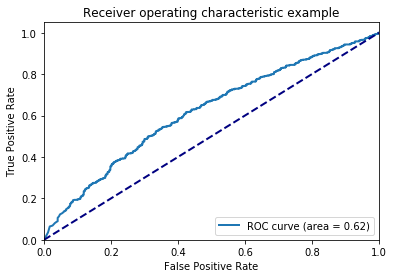

In [22]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
%matplotlib inline


#false and true pos rate
fpr_lstm, tpr_lstm, _ = roc_curve(Y_test[:, 1], yhat_lstm[:,1])  
## added bracket after Y_test to get two columns, last time we just had one long line


plt.figure()
plt.plot(fpr_lstm, tpr_lstm, lw=2,
         label='ROC curve (area = %0.2f)' % roc(Y_test[:, 1], yhat_lstm[:,1]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig("./roc_curve_lstm_100epochs.png")

In [ ]:
## not getting much lift from LR (best ROC = .69)

# 
# http://www.cs.cmu.edu/~ark/TweetNLP/
# things that occur in different contexts (republican friend sttarts to make a democratic statement that's unlikely, or less likely than change)

## pmi association test. frequency counts of how often things occur together (reddit dumps -- one month of data--  or wiki)

## what kinds of regular things that show up? categories of words that are indicative or irony orfrustratio?

# sentiment -- winter has a negative sentiment and nice has a positive sentiment. if there's a big differece in the sentimenet of the thring.

## a positive adjective and a negative noun??

##  does it mention time?

# https://github.com/Ejhfast/empath-client feature engineering

# parsing not necessary, but could be useful. need to figure out what about it is making it ironic.

## like with the pun detection there was a certain word that made it funy# could parparsing reveal that word or help me quickly find that work?

#  can you filter out the handles? how many peope get mentiooned, do the mentions show up at the beginning or the end?
# what's up with the periods between some words, before handles?

# some linguistic categories: negation. hedging. other modal things like "even" or just. the adverbial just. that's where pos could help. are these intensifiers?. an intensifier "i so love"

## DJ brought up: "97	1	Planned on an early night last night.. Oh yaa course that happened..  #gotinterupted
"

#failed plans script or frame? 

##does the contrast to the sentiment need to be in the front "what a joke..." 
# this is where parsing could help. want a parse tree where there are two parts-- one very pos one neg and they meet somewhere at the top.

